In [1]:
import pandas as pd
import numpy as np
import NDCG as ndcg
import MHR as mhr
import sys
import types
ndcg.reload_package(mhr)
from sklearn.svm import SVR, LinearSVR
from sklearn.grid_search import GridSearchCV
from scipy.stats import spearmanr
from sklearn.metrics import make_scorer
from time import time
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
%matplotlib inline

loading MHR


In [2]:
def pr_hs(r): 
    try:
        return ( 1 / r['pageRank'] ) + ( 1 / r['hits'] )
    except:
        return 0

def pr_len(r): 
    try:
        return ( 1 / r['pageRank'] ) + ( 1 / r['word_count'] )
    except:
        return 0
    
def hs_len(r): 
    try:
        return ( 1 / r['hits'] ) + ( 1 / r['word_count'] )
    except:
        return 0

def pr_hs_len(r): 
    try:
        return ( 1 / r['pr_hs'] ) + ( 1 / r['hs_len'] )
    except:
        return 0

def word_count(r): 
    try:
        return len(tokenizer.tokenize(r["reviewText"]))
    except:
        return 0

In [3]:
reviews_features = pd.read_csv('data/book_eletronic_sample_counts.csv.gz')
reviews_features = reviews_features[reviews_features.pageRank>0]
print reviews_features.shape
df_columns = reviews_features.select_dtypes(include=['float64','int','int64']).columns
df_columns

/usr/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (7,8,10,11,12,13,14,28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(24234, 32)


Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Unnamed: 0.1', u'Unnamed: 0.1.1',
       u'Unnamed: 0.1.1', u'Unnamed: 0.1.1.1', u'Unnamed: 0.1.1.1', u'overall',
       u'unixReviewTime', u'helpfulness', u'tot', u'pageRank', u'hits',
       u'powerWithStar', u'word_count', u'pr_hs', u'pr_len', u'hs_len',
       u'pr_hs_len', u'sentence_count', u'unigram_count', u'adj', u'noun',
       u'revRank'],
      dtype='object')

In [4]:
reviews_features['word_count']=reviews_features.apply(word_count,axis=1)
reviews_features['pr_hs']=reviews_features.apply(pr_hs,axis=1)
reviews_features['pr_len']=reviews_features.apply(pr_len,axis=1)
reviews_features['hs_len']=reviews_features.apply(hs_len,axis=1)
reviews_features['pr_hs_len']=reviews_features.apply(pr_hs_len,axis=1)
#reviews_features.to_csv('data/book_sample.csv.gz', compression='gzip')
reviews_features.shape

(24234, 32)

In [5]:
def helpf(x):
    x = str(x['helpful']) 
    try:
        pos = x.replace("[","").replace("]","").split(',')[0]
        neg = x.replace("[","").replace("]","").split(',')[1]
        tot = x.replace("[","").replace("]","").split(',')[1]
        return float ( float(pos) /  float(tot) )
    except:
        return 0

def tot(x): 
    x = str(x['helpful'])
    #print x.replace("[","").replace("]","").split(',')[1]
    try:
        return x.replace("[","").replace("]","").split(',')[1]
    except:
        return 0



reviews_features['helpfulness']=reviews_features.apply(helpf,axis=1)
reviews_features['tot']=reviews_features.apply(tot,axis=1)
    


In [6]:
reviews_features,ndcg_mhr = mhr.executeFromDf(reviews_features)


product=0002051850 ndcg=0.848203966461 (0.848203966461)
product=000224053X ndcg=0.83359521642 (0.81898646638)
product=0006393195 ndcg=0.810823160893 (0.765279049838)
product=0006530702 ndcg=0.814125185828 (0.824031260633)
product=0007157150 ndcg=0.829987607214 (0.893437292756)
product=0007167040 ndcg=0.833198001481 (0.84924997282)
product=000721278X ndcg=0.847786057615 (0.935314394419)
product=0007228023 ndcg=0.857178077269 (0.922922214848)
product=0007231601 ndcg=0.859301227488 (0.876286429238)
product=000779021X ndcg=0.850358815878 (0.769877111387)
product=0026045702 ndcg=0.854789090998 (0.899091842202)
product=0029109752 ndcg=0.855295109448 (0.86086131239)
product=006000942X ndcg=0.858468883409 (0.896554170951)
product=0060083816 ndcg=0.855896165389 (0.822450831119)
product=0060084332 ndcg=0.856296203594 (0.861896738469)
product=0060175869 ndcg=0.857507027048 (0.87566937886)
product=0060192119 ndcg=0.85167601311 (0.758379790092)
product=006019491X ndcg=0.8429199858 (0.694067521542)


/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


pr_hs ndcg=0.467321115009
pr_len ndcg=0.465769832771
hs_len ndcg=0.469452279099
pr_hs_len ndcg=0.77131406432
PageRank ndcg=0.770294098881
HITs ndcg=0.772097593674
MHR ndcg=0.811973205358
RevRank ndcg=0.687907919614
461
461
461
461
461
461
461
461


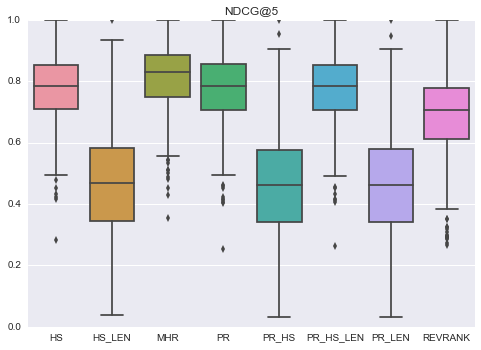

In [7]:
import seaborn as sns
k=5

ndcg_pr_hs=ndcg.calc_ndcg(reviews_features,'pr_hs',k) 
corr_pr_hs=ndcg.calc_corr(reviews_features,'pr_hs') 
print "pr_hs ndcg="+str(np.mean(ndcg_pr_hs))

ndcg_pr_len=ndcg.calc_ndcg(reviews_features,'pr_len',k) 
corr_pr_len=ndcg.calc_corr(reviews_features,'pr_len') 
print "pr_len ndcg="+str(np.mean(ndcg_pr_len))

ndcg_hs_len=ndcg.calc_ndcg(reviews_features,'hs_len',k) 
corr_hs_len=ndcg.calc_corr(reviews_features,'hs_len') 
print "hs_len ndcg="+str(np.mean(ndcg_hs_len))

ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'pr_hs_len',k) 
corr_pr_hs_len=ndcg.calc_corr(reviews_features,'pr_hs_len') 
print "pr_hs_len ndcg="+str(np.mean(ndcg_pr_hs_len))

ndcg_pr=ndcg.calc_ndcg(reviews_features,'pageRank',k) 
corr_pr=ndcg.calc_corr(reviews_features,'pageRank') 
print "PageRank ndcg="+str(np.mean(ndcg_pr))

ndcg_hs=ndcg.calc_ndcg(reviews_features,'hits',k) 
corr_hs=ndcg.calc_corr(reviews_features,'hits') 
print "HITs ndcg="+str(np.mean(ndcg_hs))

#ndcg_mhr=ndcg.calc_ndcg(reviews_features,'powerWithStar',k) 
#corr_mhr=ndcg.calc_corr(reviews_features,'powerWithStar') 
print "MHR ndcg="+str(np.mean(ndcg_mhr))

#ndcg_mhrs=ndcg.calc_ndcg(reviews_features,'MHRs',k) 
#corr_mhrs=ndcg.calc_corr(reviews_features,'MHRs') 
#print "MHRs ndcg="+str(np.mean(ndcg_mhrs))

ndcg_revRank=ndcg.calc_ndcg(reviews_features,'revRank',k) 
corr_revRank=ndcg.calc_corr(reviews_features,'revRank') 
print "RevRank ndcg="+str(np.mean(ndcg_revRank))

print (len(ndcg_pr_hs))
print (len(ndcg_pr_len))
print (len(ndcg_hs_len))
print (len(ndcg_pr_hs_len))
print (len(ndcg_hs))
print (len(ndcg_pr))
print (len(ndcg_mhr))
#print (len(ndcg_mhrs))
print (len(ndcg_revRank))

tip={}
tip['PR_HS']=ndcg_pr_hs
tip['PR_LEN']=ndcg_pr_len
tip['HS_LEN']=ndcg_hs_len
tip['PR_HS_LEN']=ndcg_pr_hs_len
tip['HS']=ndcg_hs
tip['PR']=ndcg_pr
tip['MHR']=ndcg_mhr
tip['REVRANK']=ndcg_revRank
#tip['MHRs']=ndcg_mhrs
df = pd.DataFrame(tip)
ax = sns.boxplot(data=df)
#ax = sns.swarmplot(data=df, color=".25")
ax.set_title('NDCG@'+str(k))

In [8]:
ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'pr_hs_len',1) 
print "pr_hs_len ndcg 1="+str(np.mean(ndcg_pr_hs_len))
ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'pr_hs_len',3) 
print "pr_hs_len ndcg 3="+str(np.mean(ndcg_pr_hs_len))
ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'pr_hs_len',5) 
print "pr_hs_len ndcg 5="+str(np.mean(ndcg_pr_hs_len))

pr_hs_len ndcg 1=0.726896292723
pr_hs_len ndcg 3=0.756294836225
pr_hs_len ndcg 5=0.77131406432


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

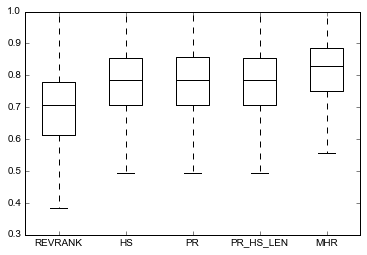

In [9]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import matplotlib.pyplot as plt 
%matplotlib inline
data_to_plot = [ndcg_revRank, ndcg_hs, ndcg_pr, ndcg_pr_hs_len, ndcg_mhr]


bp = plt.boxplot(data_to_plot, labels=["REVRANK","HS","PR","PR_HS_LEN","MHR"], sym='')
plt.setp(bp['boxes'], linewidth=1, color='black')
plt.setp(bp['fliers'], linewidth=1, color='black')
plt.setp(bp['medians'], linewidth=1, color='black')
plt.setp(bp['whiskers'], linewidth=1, color='black')

In [10]:
ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'revRank',1) 
print "revRank ndcg 1="+str(np.mean(ndcg_pr_hs_len))
ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'revRank',3) 
print "revRank ndcg 3="+str(np.mean(ndcg_pr_hs_len))
ndcg_pr_hs_len=ndcg.calc_ndcg(reviews_features,'revRank',5) 
print "revRank ndcg 5="+str(np.mean(ndcg_pr_hs_len))

revRank ndcg 1=0.672319749567
revRank ndcg 3=0.679468289057
revRank ndcg 5=0.687907919614
